# Problem 1: Central Limit Theorem and Simulation

**a)** For this problem, we will be sampling from the Uniform distribution with bounds [0, 100]. Before we simulate anything, let's make sure we understand what values to expect. If $X \sim U(0, 100)$, what is $E[X]$ and $Var(X)$? Work these answers out on paper so you will have something to compare your simulated results to.

In [6]:
# E[X] = (a + b) /2
# V[X] = (b − a)^2 / 12 so,
ex = (0 + 100) / 2
vx = (100-0)^2 / 12
ex
vx

[1] 50

[1] 833.3333

**b)** In real life, if we want to estimate the mean of a population, we have to draw a sample from that population and compute the sample mean. The important questions we have to ask are things like:

* Is the sample mean a good approximation of the population mean?
* How large does my sample need to be in order for the sample mean to well-approximate the population mean?

Complete the following function to sample $n$ rows from the $U(0, 100)$ distribution and return the sample mean. Start with a sample size of 10 and draw a sample mean from your function. Is the estimated mean a good approximation for the population mean we computed above? What if you increase the sample size?

In [13]:
# Complete and run this cell

uniform.sample.mean = function(n){
    # Your Code Here
    u = runif(n, min = 0, max = 100) # sample value between 0-100
    sample.mean = mean(u)
    return(sample.mean)
}

uniform.sample.mean(10)

[1] 57.74165

**c)** Notice, for a sample size of $n$, our function is returning an estimator of the form

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i 
$$

That means, if each $X_i$ is a random variable, then our sample mean is also a random variable with its own distribution. We call this disribution the sample distribution. Let's take a look at what this distribution looks like.  

Using the `uniform.sample.mean` function, simulate $m=1000$ sample means, each from a sample of size $n=10$. Create a histogram of these sample means. Then increase the value of $n$ and plot the histogram of those sample means. What do you notice about the distribution of $\bar{X}$? What is the mean $\mu$ and variance $\sigma^2$ of the sample distribution?

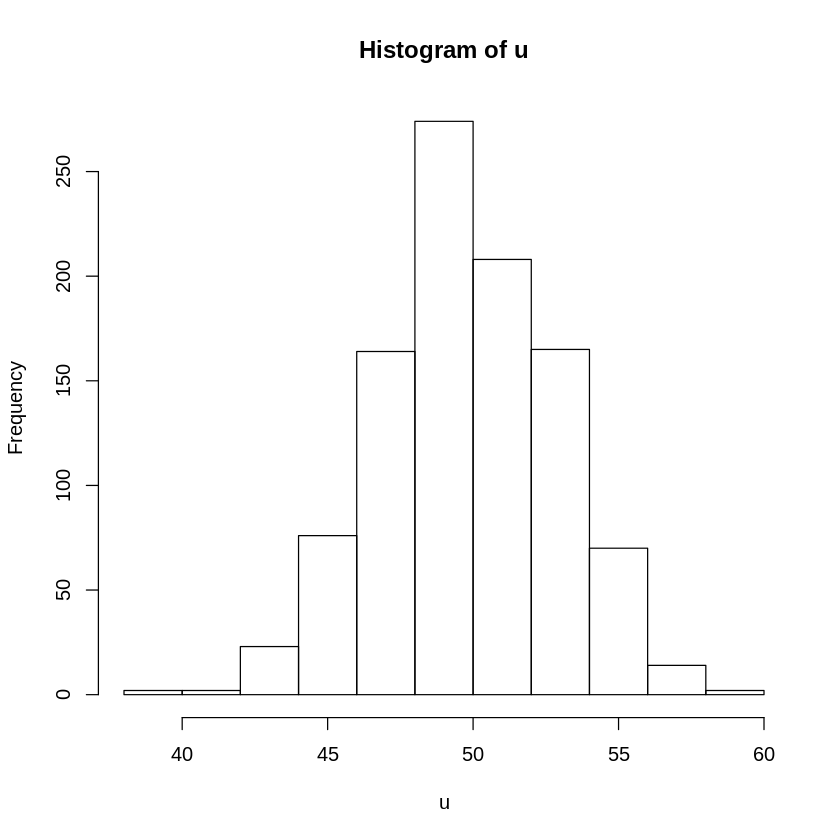

In [24]:
# Your Code Here
m = 1000
n = 100
u =  rep(0, m)
for(i in 1:m){
    u[i] = uniform.sample.mean(n)
}

hist(u)

# As n increases the values in the histogram gets closer to the mean (which means the variance/spread decreases)

<hr>

# Problem 2

Let $X$ be a random variable for the face value of a fair $d$-sided die after a single roll. $X$ follows a discrete uniform distribution of the form $\textrm{unif}\{1,d\}$. Below is the mean and variance of $\textrm{unif}\{1,d\}$.

$$ E[X] = \dfrac{1+d}{2} \qquad Var(X) = \dfrac{(d- 1 + 1)^2 - 1}{12}$$

**a)** Let $\bar{X}_n$ be the random variable for the mean of $n$ die rolls. Based on the Central Limit Theorem, what distribution does $\bar{X}_n$ follow when $d=6$?

**b)** Generate $n=1000$ die values, with $d=6$. Calculate the running average of your die rolls. In other words, create an array $r$ such that:

$$ r[j] = \sum_{i=1}^j \dfrac{X_i}{j} $$

Finally, plot your running average per the number of iterations. What do you notice?

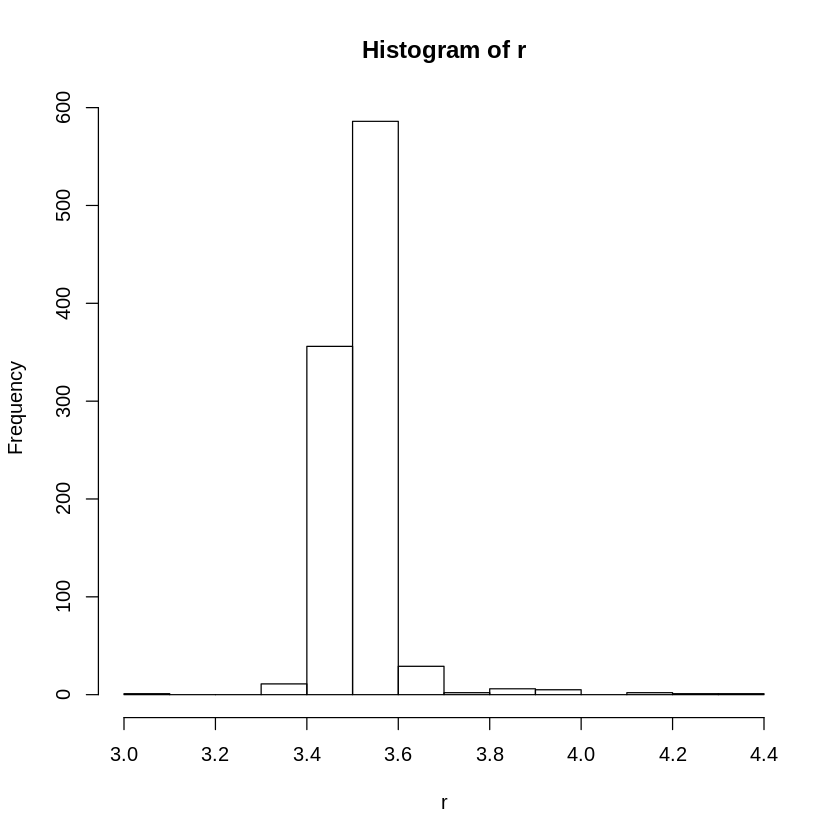

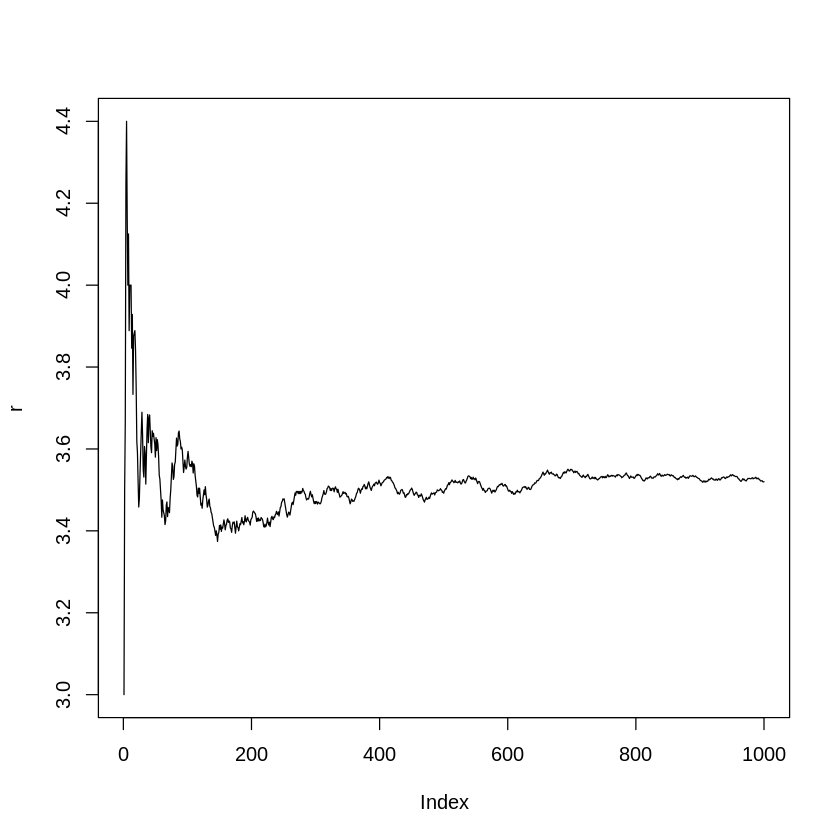

In [49]:
# Your code here.
# a) if d=6, E[X] = 3.5 and V[X] = 2.92
#    Xn ~ N(3.5, 2.92/n)
n=1000
rolls = rep(0, n)
r = rep(0, n)

# Roll dice
for(i in 1:n){
    rolls[i] = sample(1:6,1)
}

cumsum = 0 # Cumulative sum
for(c in 1:n){
    cumsum = cumsum + rolls[c]
    r[c] = cumsum / c
}

# As n gets larger, the running average gets closer to the mean of dicrete uniform distribution 
hist(r)
plot(r, type = "l")